## Observations and Insights 

In [36]:
#Report:

#   Capomulin is an affective treatment based on the data collected.
#   Capomulin has the largest number of data points in this study to back up its validity 
#   On our sample subject, we can see as time increases the size of the tumour decrease resulting in an inverse relationship implying that the treatment was having a positive affect on reducing the size of the tumour.
#   The weight of the mouse and size of tumour appears correlated. With a correlation coefficient of 0.83 we can conclude a good to strong positive correlation between these two metrics.
#   To further this analysis, I would next calculate the delta of the tumour volume from lowest to highest timepoints and then compared for each mouse with then the abilities to compare against different treatments.

In [37]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy import stats

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
raw_Data = pd.DataFrame(mouse_metadata.merge(study_results, on="Mouse ID"))
study_Data = raw_Data
# Display the data table for preview
study_Data.rename(columns={'Age_months':'Age (Months)'}, inplace = True)
study_Data.head()

,Mouse ID,Drug Regimen,Sex,Age (Months),Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [38]:
# Checking the number of mice.
study_Data["Mouse ID"].nunique()
study_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Mouse ID             1893 non-null   object 
 1   Drug Regimen         1893 non-null   object 
 2   Sex                  1893 non-null   object 
 3   Age (Months)         1893 non-null   int64  
 4   Weight (g)           1893 non-null   int64  
 5   Timepoint            1893 non-null   int64  
 6   Tumour Volume (mm3)  1893 non-null   float64
 7   Metastatic Sites     1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


In [39]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_Entries  = study_Data[study_Data.duplicated(subset=['Mouse ID', 'Timepoint'])]
dup_Entries = dup_Entries[['Mouse ID', 'Timepoint']]
dup_Entries


,Mouse ID,Timepoint
909,g989,0
911,g989,5
913,g989,10
915,g989,15
917,g989,20


In [40]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_Data = study_Data[study_Data.duplicated(subset=['Mouse ID', 'Timepoint'])]
dup_Data

,Mouse ID,Drug Regimen,Sex,Age (Months),Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [41]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
study_Data = study_Data.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
study_Data.head()

,Mouse ID,Drug Regimen,Sex,Age (Months),Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [42]:
# Checking the number of mice in the clean DataFrame.
clean_check= study_Data[study_Data.duplicated(subset=['Mouse ID', 'Timepoint'])]
clean_check

,Mouse ID,Drug Regimen,Sex,Age (Months),Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites


## study_Data Statistics

In [43]:
# Generate a study_Data statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen
regimen_df = study_Data[["Drug Regimen", "Tumour Volume (mm3)"]]

# Use groupby and study_Data statistical methods to calculate the following properties of each drug regimen: 
# mean 
tumorMean = regimen_df.groupby(['Drug Regimen']).mean()
tumorMean = tumorMean.rename(columns={"Tumour Volume (mm3)":"Tumour Size Mean"})
tumorMean


,Tumour Size Mean
Drug Regimen,
Capomulin,40.675741
Ceftamin,52.591172
Infubinol,52.884795
Ketapril,55.235638
Naftisol,54.331565
Placebo,54.033581
Propriva,52.393463
Ramicane,40.216745
Stelasyn,54.233149


In [44]:
# median
tumorMedian = regimen_df.groupby(['Drug Regimen']).median()
tumorMedian = tumorMedian.rename(columns={"Tumour Volume (mm3)":"Tumour Size Median"})
tumorMedian

,Tumour Size Median
Drug Regimen,
Capomulin,41.557809
Ceftamin,51.776157
Infubinol,51.820584
Ketapril,53.698743
Naftisol,52.509285
Placebo,52.288934
Propriva,50.909965
Ramicane,40.673236
Stelasyn,52.431737


In [45]:
# variance
tumorVariance = regimen_df.groupby(['Drug Regimen']).var()
tumorVariance = tumorVariance.rename(columns={"Tumour Volume (mm3)":"Tumour Size Variance"})
tumorVariance

,Tumour Size Variance
Drug Regimen,
Capomulin,24.947764
Ceftamin,39.290177
Infubinol,43.128684
Ketapril,68.553577
Naftisol,66.173479
Placebo,61.168083
Propriva,43.138803
Ramicane,23.486704
Stelasyn,59.450562


In [46]:
# standard deviation
tumorSTD = regimen_df.groupby(['Drug Regimen']).std()
tumorSTD = tumorSTD.rename(columns={"Tumour Volume (mm3)":"Tumour Size Std Dev"})
tumorSTD

,Tumour Size Std Dev
Drug Regimen,
Capomulin,4.994774
Ceftamin,6.268188
Infubinol,6.567243
Ketapril,8.279709
Naftisol,8.134708
Placebo,7.821003
Propriva,6.568014
Ramicane,4.846308
Stelasyn,7.710419


In [47]:
# SEM of the tumour volume
tumorSEM = regimen_df.groupby(['Drug Regimen']).sem()
tumorSEM = tumorSEM.rename(columns={"Tumour Volume (mm3)":"Tumour Size SEM"})
tumorSEM

,Tumour Size SEM
Drug Regimen,
Capomulin,0.329346
Ceftamin,0.469821
Infubinol,0.492236
Ketapril,0.603860
Naftisol,0.596466
Placebo,0.581331
Propriva,0.525862
Ramicane,0.320955
Stelasyn,0.573111


In [48]:
# Assemble the resulting series into a single study_Data dataframe.
# Treatment Statistical Summary Table
treatment_Data = tumorMean.merge(tumorMedian, on='Drug Regimen').merge(tumorVariance, on='Drug Regimen').merge(tumorSTD, on='Drug Regimen').merge(tumorSEM, on='Drug Regimen')
# Treatment Statistical Summary Table
treatment_Data

,Tumour Size Mean,Tumour Size Median,Tumour Size Variance,Tumour Size Std Dev,Tumour Size SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [49]:
# Generate a study_Data statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen
# Using the aggregation method, produce the same study_Data statistics in a single line

treatment_Agg = study_Data.groupby('Drug Regimen').aggregate({"Tumour Volume (mm3)":['mean', 'median', 'var', 'std','sem']})
# Treatment Statistical Summary Table
treatment_Agg

Tumour Volume (mm3)                                          
                            mean     median        var       std       sem
Drug Regimen                                                              
Capomulin              40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin               52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol              52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril               55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol               54.331565  52.509285  66.173479  8.134708  0.596466
Placebo                54.033581  52.288934  61.168083  7.821003  0.581331
Propriva               52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane               40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn               54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol              53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

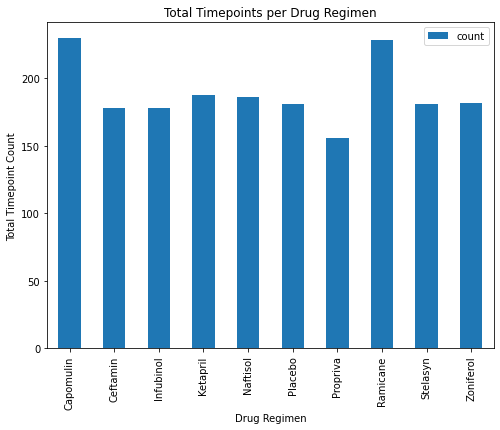

In [50]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
treatment_time_count = study_Data.groupby('Drug Regimen').aggregate({"Timepoint":['count']})
treatment_time_count.plot.bar(title='Total Timepoints per Drug Regimen', y='Timepoint', figsize=(8, 6))
plt.ylabel('Total Timepoint Count')
plt.xlabel('Drug Regimen')
plt.show()

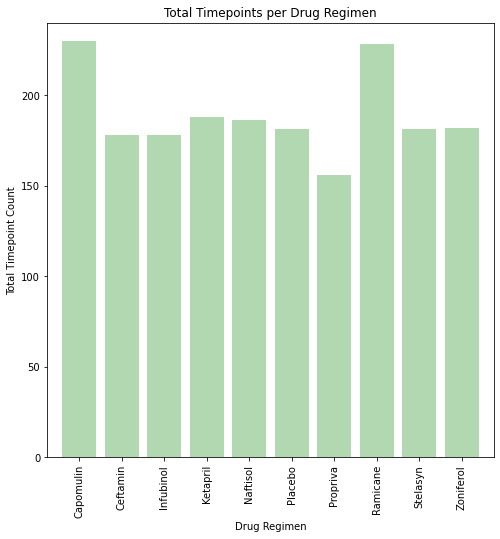

230

In [69]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = np.arange(len(treatment_time_count))

tick_locations = []
for x in x_axis:
    tick_locations.append(x)
plt.xticks(rotation=90)

timepoint_Data = treatment_time_count['Timepoint'].reset_index()

indexlist = treatment_time_count.index.tolist()

max_value = timepoint_Data.max()['count']

plt.rcParams["figure.figsize"] = (6,8)
plt.bar(x_axis,timepoint_Data['count'], color='green',alpha=0.30, align="center")
plt.ylabel('Total Timepoint Count')
plt.xlabel('Drug Regimen')
plt.title('Total Timepoints per Drug Regimen')
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, (max_value)+10)
plt.xticks(tick_locations, indexlist)
plt.show()
max_value

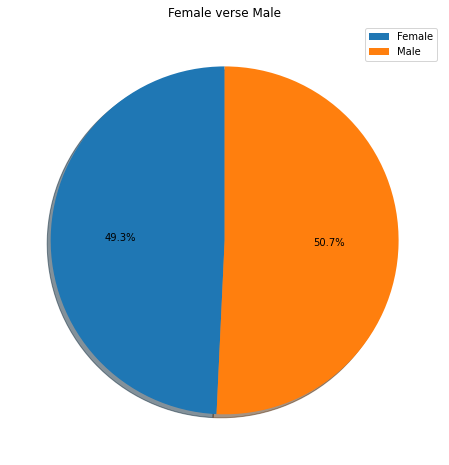

In [52]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
fm_Data = study_Data.groupby('Sex')['Mouse ID'].count()
#fm_Data = study_Data.groupby('Sex').aggregate({"Sex":['count']})
fm_Data.plot.pie(title='Female verse Male', y='Sex', autopct='%1.1f%%', figsize=(8, 8), shadow='True', startangle=90, legend=True, labeldistance=None)
plt.ylabel("") 
plt.show()

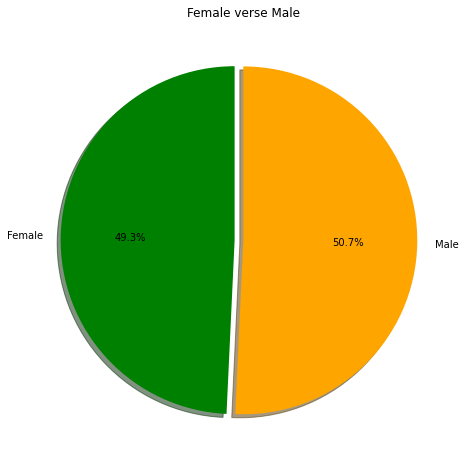

In [53]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

label = fm_Data.keys()

explode = (0.05, 0)
# Setting the size of the chart
plt.rcParams["figure.figsize"] = (8,8)

fig1, ax1 = plt.subplots()
ax1.pie(fm_Data, explode=explode, labels=label, autopct='%1.1f%%',
        shadow=True, startangle=90, colors=['green','orange'])
plt.title('Female verse Male')
plt.show()

## Quartiles, Outliers and Boxplots

In [54]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
finalTP_Data = pd.DataFrame(study_Data.groupby("Mouse ID")["Timepoint"].max())
finalTP_Data = finalTP_Data.rename(columns={'Timepoint':'Final Timepoint'})
finalTP_Data.head()


,Final Timepoint
Mouse ID,
a203,45
a251,45
a262,45
a275,45
a366,30


In [55]:
# Merge this group df with the original dataframe to get the tumour volume at the last timepoint
study_Data =pd.merge(study_Data, finalTP_Data, how='outer', on='Mouse ID')

tumour_Final_Size = (study_Data.loc[study_Data["Timepoint"] == study_Data['Final Timepoint'],
                                                ["Mouse ID","Tumour Volume (mm3)"]]).set_index("Mouse ID")

tumour_Final_Size = tumour_Final_Size.rename(columns={'Tumour Volume (mm3)':'Tumour Final Vol'})

tumour_Final_Size.head()




,Tumour Final Vol
Mouse ID,
k403,22.050126
s185,23.343598
x401,28.484033
m601,28.430964
g791,29.128472


In [56]:
# Merging Data
study_Data = pd.merge(study_Data, tumour_Final_Size, how='outer', on='Mouse ID')
# Final Clean Dataset
study_Data.head()

,Mouse ID,Drug Regimen,Sex,Age (Months),Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites,Final Timepoint,Tumour Final Vol
0,k403,Ramicane,Male,21,16,0,45.000000,0,45,22.050126
1,k403,Ramicane,Male,21,16,5,38.825898,0,45,22.050126
2,k403,Ramicane,Male,21,16,10,35.014271,1,45,22.050126
3,k403,Ramicane,Male,21,16,15,34.223992,1,45,22.050126
4,k403,Ramicane,Male,21,16,20,32.997729,1,45,22.050126


In [57]:
# Created DF to store single row data entries for all Mouse IDs with timepoint 0
study_Data_T0 = study_Data.loc[study_Data["Timepoint"] == 0,:]
study_Data_T0.head()

,Mouse ID,Drug Regimen,Sex,Age (Months),Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites,Final Timepoint,Tumour Final Vol
0,k403,Ramicane,Male,21,16,0,45.0,0,45,22.050126
10,s185,Capomulin,Female,3,17,0,45.0,0,45,23.343598
20,x401,Capomulin,Female,16,15,0,45.0,0,45,28.484033
30,m601,Capomulin,Male,22,17,0,45.0,0,45,28.430964
40,g791,Ramicane,Male,11,16,0,45.0,0,45,29.128472


In [58]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol","Ceftamin"]

# Create empty list to fill with tumour vol data (for plotting)
tumour_Vol_Data = []
total_Outliers = []
for drug in treatments:
    # Save into our empty list a Dataframe with the data that meets the conditions: 'Drug Regimen' = drug, drug is gained from our treatments list
    tumour_Vol_Data.append((study_Data_T0.loc[study_Data_T0["Drug Regimen"] == drug, ["Tumour Final Vol"]]))
 
# For i in the length of the list we created of the Drug Regimens we are seeking analysis on:
# Computing interquartile ranges and checking for outliers

for i in range(len(treatments)):
   
    q3, q1 = np.percentile(tumour_Vol_Data[i], [75 ,25])

    lowerq = q1
    upperq = q3
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    outlier_data = tumour_Vol_Data[i]
    outlier_data
    outlier_occupancy = outlier_data.loc[(outlier_data['Tumour Final Vol'] < lower_bound) | (outlier_data['Tumour Final Vol'] > upper_bound)]
    
    #Store the Outlier information, incase we need to access it again later.
    total_Outliers.append(outlier_occupancy)
    
    #Print to terminal any outliers we find in the dataset
    if len(outlier_occupancy) > 0:
         print(f'Outlier: The study data on {treatments[i]} has flagged for outlier with a Tumour Final Vol value of {outlier_occupancy["Tumour Final Vol"].values}')
    


Outlier: The study data on Infubinol has flagged for outlier with a Tumour Final Vol value of [36.3213458]


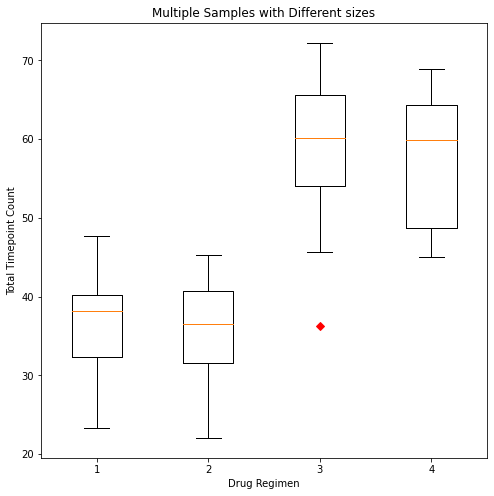

In [72]:
data = []
for i in range(len(tumour_Vol_Data)):
    data.append(tumour_Vol_Data[i]["Tumour Final Vol"])
plt.rcParams["figure.figsize"] = (8,8)
fig7, ax7 = plt.subplots()
ax7.set_title('Multiple Samples with Different sizes')    
ax7.boxplot(data, 0,'rD')
plt.ylabel('Total Timepoint Count')
plt.xlabel('Drug Regimen')
plt.show()

In [60]:
# Alternative method I naturally attempted initially before going back and constructing it as how the Homework requested.


# Calculate the IQR and quantitatively determine if there are any potential outliers.
# Locate the rows which contain mice on each drug and get the tumour volumes
Ramicane_df = study_Data_T0.loc[study_Data_T0['Drug Regimen'] == 'Ramicane',:]
Ramicane_TumourEnd = Ramicane_df.set_index("Drug Regimen")['Tumour Final Vol']

#upper and lower bounds
quartiles = Ramicane_TumourEnd.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

    
# Determine outliers
outlier_data = Ramicane_TumourEnd.reset_index()
outlier_occupancy = outlier_data.loc[(outlier_data['Tumour Final Vol'] < lower_bound) | (outlier_data['Tumour Final Vol'] > upper_bound)]
outlier_occupancy


The lower quartile of temperatures is: 31.56046955
The upper quartile of temperatures is: 40.65900627
The interquartile range of temperatures is: 9.098536719999998
The the median of temperatures is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


,Drug Regimen,Tumour Final Vol


In [61]:
# Calculate the IQR and quantitatively determine if there are any potential outliers.
# Locate the rows which contain mice on each drug and get the tumour volumes
Infubinol_df = study_Data_T0.loc[study_Data_T0['Drug Regimen'] == 'Infubinol',:]
Infubinol_TumourEnd = Infubinol_df.set_index("Drug Regimen")['Tumour Final Vol']

#upper and lower bounds
quartiles = Infubinol_TumourEnd.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

# Determine outliers
outlier_data = Infubinol_TumourEnd.reset_index()
outlier_occupancy = outlier_data.loc[(outlier_data['Tumour Final Vol'] < lower_bound) | (outlier_data['Tumour Final Vol'] > upper_bound)]
outlier_occupancy


The lower quartile of temperatures is: 54.04860769
The upper quartile of temperatures is: 65.52574285
The interquartile range of temperatures is: 11.477135160000003
The the median of temperatures is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


,Drug Regimen,Tumour Final Vol
5,Infubinol,36.321346


In [62]:
# Calculate the IQR and quantitatively determine if there are any potential outliers.
# Locate the rows which contain mice on each drug and get the tumour volumes
Capomulin_df = study_Data_T0.loc[study_Data_T0['Drug Regimen'] == 'Capomulin',:]
Capomulin_TumourEnd = Capomulin_df.set_index("Drug Regimen")['Tumour Final Vol']

#upper and lower bounds
quartiles = Capomulin_TumourEnd.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

# Determine outliers
outlier_data = Capomulin_TumourEnd.reset_index()
outlier_occupancy = outlier_data.loc[(outlier_data['Tumour Final Vol'] < lower_bound) | (outlier_data['Tumour Final Vol'] > upper_bound)]
outlier_occupancy

The lower quartile of temperatures is: 32.37735684
The upper quartile of temperatures is: 40.1592203
The interquartile range of temperatures is: 7.781863460000004
The the median of temperatures is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


,Drug Regimen,Tumour Final Vol


In [63]:
# Calculate the IQR and quantitatively determine if there are any potential outliers.
# Locate the rows which contain mice on each drug and get the tumour volumes
Ceftamin_df = study_Data_T0.loc[study_Data_T0['Drug Regimen'] == 'Ceftamin',:]
Ceftamin_TumourEnd = Ceftamin_df.set_index("Drug Regimen")['Tumour Final Vol']

#upper and lower bounds
quartiles = Ceftamin_TumourEnd.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

# Determine outliers
outlier_data = Ceftamin_TumourEnd.reset_index()
outlier_occupancy = outlier_data.loc[(outlier_data['Tumour Final Vol'] < lower_bound) | (outlier_data['Tumour Final Vol'] > upper_bound)]
outlier_occupancy

The lower quartile of temperatures is: 48.72207785
The upper quartile of temperatures is: 64.29983003
The interquartile range of temperatures is: 15.577752179999997
The the median of temperatures is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


,Drug Regimen,Tumour Final Vol


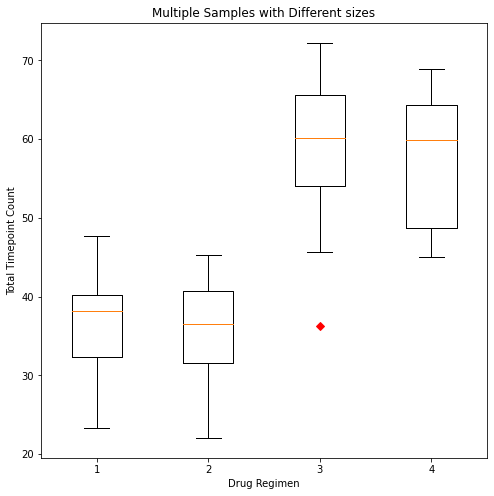

In [73]:
# Generate a box plot of the final tumour volume of each mouse across four regimens of interest

data = [Capomulin_TumourEnd, Ramicane_TumourEnd, Infubinol_TumourEnd, Ceftamin_TumourEnd]
plt.rcParams["figure.figsize"] = (8,8)
fig7, ax7 = plt.subplots()
ax7.boxplot(data, 0,'rD')
ax7.set_title('Multiple Samples with Different sizes')
plt.ylabel('Total Timepoint Count')
plt.xlabel('Drug Regimen')
plt.show()

## Line and Scatter Plots

In [65]:
# Generate a line plot of tumour volume vs. time point for a mouse treated with Capomulin
Capomulin_df = study_Data.loc[study_Data['Drug Regimen'] == 'Capomulin',:]
Capomulin_df.groupby('Mouse ID').max().head(20)


,Drug Regimen,Sex,Age (Months),Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites,Final Timepoint,Tumour Final Vol
Mouse ID,,,,,,,,,
b128,Capomulin,Female,9,22,45,45.651331,2,45,38.982878
b742,Capomulin,Male,7,21,45,45.000000,0,45,38.939633
f966,Capomulin,Male,16,17,20,45.000000,0,20,30.485985
g288,Capomulin,Male,3,19,45,46.304003,1,45,37.074024
g316,Capomulin,Female,22,22,45,46.809225,2,45,40.159220
i557,Capomulin,Female,1,24,45,47.685963,1,45,47.685963
i738,Capomulin,Female,23,20,45,45.595685,2,45,37.311846
j119,Capomulin,Female,7,23,45,48.158209,1,45,38.125164
j246,Capomulin,Female,21,21,35,46.408361,1,35,38.753265


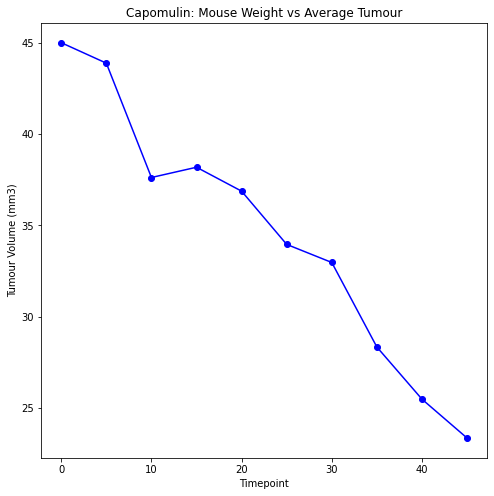

In [66]:
test_Subject = 's185'

cap_sub = pd.DataFrame(study_Data.loc[study_Data['Mouse ID'] == test_Subject,:])
cap_sub[["Timepoint", "Tumour Volume (mm3)"]]

x_axis = cap_sub['Timepoint']

plt.plot(x_axis, cap_sub['Tumour Volume (mm3)'], marker='o', color='blue')
plt.title('Capomulin: Mouse Weight vs Average Tumour')
plt.ylabel('Tumour Volume (mm3)')
plt.xlabel('Timepoint')
plt.show()

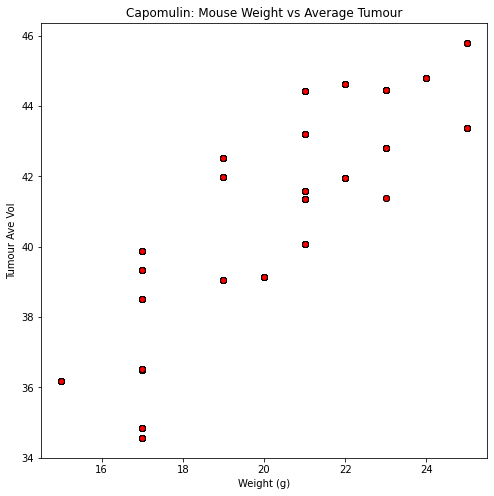

In [75]:
# Generate a scatter plot of average tumour volume vs. mouse weight for the Capomulin regimen

tumourVmouseweight = pd.DataFrame(Capomulin_df.groupby('Mouse ID')['Tumour Volume (mm3)'].mean())
tumourVmouseweight = tumourVmouseweight.rename(columns={'Tumour Volume (mm3)':'Tumour Ave Vol'})
Capomulin_df = pd.merge(Capomulin_df, tumourVmouseweight, how='outer', on='Mouse ID')



x = Capomulin_df["Weight (g)"]
y = Capomulin_df["Tumour Ave Vol"]


plt.scatter(x,y,  marker="o", facecolors="red", edgecolors="black")
plt.title('Capomulin: Mouse Weight vs Average Tumour')
plt.ylabel('Tumour Ave Vol')
plt.xlabel('Weight (g)')
plt.show()


## Correlation and Regression

The correlation coefficient between average tumour volume and mouse weight is 0.83


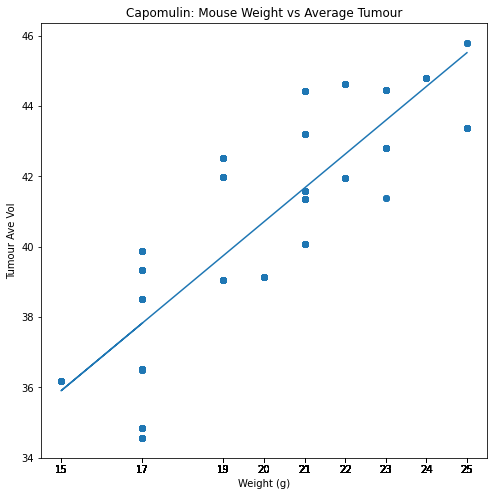

In [68]:
# Calculate the correlation coefficient and linear regression model 
print(f"The correlation coefficient between average tumour volume and mouse weight is {round(st.pearsonr(x,y)[0],2)}")

# for mouse weight and average tumour volume for the Capomulin regimen
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(x, y)
vc_fit = vc_slope * x + vc_int

plt.scatter(x,y)
plt.plot(x,vc_fit,"-")
plt.xticks(x)
plt.ylabel('Tumour Ave Vol')
plt.xlabel('Weight (g)')
plt.title('Capomulin: Mouse Weight vs Average Tumour')
plt.show()